In [76]:
# This notebook will take the csv datasets and fill them out accordingly and clean data into usable datasets
import pandas as pd
import numpy as np
import os
import missingno as msno
import warnings

In [77]:
df = pd.read_csv('../data/Raw/D_usnwr.csv')
df['Acceptance_Rate'] = df ['Accept'] / df['Apps']
df['Enrollment_Rate'] = df['Enroll'] / df['Accept']
df['Top10perc'] = df['Top10perc'] / 100
df['Top25perc'] = df['Top25perc'] / 100
df['PhD'] = df['PhD']/100
df['Terminal'] = df['Terminal']/100
df['perc.alumni'] = df['perc.alumni']/100
df['Grad.Rate'] = df['Grad.Rate']/100
df['Student_Population'] = df['F.Undergrad'] + df['P.Undergrad']
df['Pct_Out_Of_State'] = df['Outstate'] / df['Student_Population']
df['Private'] = np.where(df.Private == 'Yes',1,0)

df = df.drop(['Apps','Accept','Enroll','F.Undergrad','P.Undergrad','Outstate'],axis=1)

cols_to_normalize = ['Room.Board','Books','Personal','S.F.Ratio','Expend','Student_Population']

for col in cols_to_normalize:
    df[col] = df[col] /df[col].abs().max()

In [78]:
#df.to_csv('../data/Raw/D_usnwr_cleaned.csv')

In [79]:
df = pd.read_csv('../data/Raw/D_forbes.csv')

cols_to_normalize = ['Net Price','Average Grant Aid','Alumni Salary','SAT Lower','SAT Upper','ACT Lower','ACT Upper']

for col in cols_to_normalize:
    df[col] = df[col] /df[col].abs().max()

df = df.drop(['Student Population','Undergraduate Population','Total Annual Cost','Acceptance Rate','Public/Private','Rank'],axis=1)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy.sparse as sp
warnings.filterwarnings("ignore", category=DeprecationWarning)

copy_df = df.copy().drop(["Name",'C_ID','City','State','Website'], axis = 1)

# https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
imp = IterativeImputer(max_iter = 650,verbose=2) # Iterate over the entire dataset to find estimate the best value
imp.fit(copy_df) # Fit the model to our dataset
df_imp = imp.transform(copy_df) # Add the fitted model and new values to a dataframe
df_imp = pd.DataFrame(df_imp, columns = copy_df.columns) # Add the columns back to the dataframe

cols_to_overwrite = ['Net Price', 'Average Grant Aid', 'Alumni Salary', 'SAT Lower','SAT Upper', 'ACT Lower', 'ACT Upper']
for col in cols_to_overwrite:
    df[col] = df_imp[col]

[IterativeImputer] Completing matrix with shape (650, 7)
[IterativeImputer] Ending imputation round 1/650, elapsed time 0.01
[IterativeImputer] Change: 0.23906473634304992, scaled tolerance: 0.001 
[IterativeImputer] Ending imputation round 2/650, elapsed time 0.01
[IterativeImputer] Change: 0.09794137091428168, scaled tolerance: 0.001 
[IterativeImputer] Ending imputation round 3/650, elapsed time 0.02
[IterativeImputer] Change: 0.04418179624764196, scaled tolerance: 0.001 
[IterativeImputer] Ending imputation round 4/650, elapsed time 0.02
[IterativeImputer] Change: 0.03368548960017759, scaled tolerance: 0.001 
[IterativeImputer] Ending imputation round 5/650, elapsed time 0.03
[IterativeImputer] Change: 0.030397242637567934, scaled tolerance: 0.001 
[IterativeImputer] Ending imputation round 6/650, elapsed time 0.04
[IterativeImputer] Change: 0.027720008660960027, scaled tolerance: 0.001 
[IterativeImputer] Ending imputation round 7/650, elapsed time 0.04
[IterativeImputer] Change: 

[IterativeImputer] Ending imputation round 14/56, elapsed time 0.01
[IterativeImputer] Ending imputation round 15/56, elapsed time 0.01
[IterativeImputer] Ending imputation round 16/56, elapsed time 0.01
[IterativeImputer] Ending imputation round 17/56, elapsed time 0.02
[IterativeImputer] Ending imputation round 18/56, elapsed time 0.02
[IterativeImputer] Ending imputation round 19/56, elapsed time 0.02
[IterativeImputer] Ending imputation round 20/56, elapsed time 0.02
[IterativeImputer] Ending imputation round 21/56, elapsed time 0.02
[IterativeImputer] Ending imputation round 22/56, elapsed time 0.02
[IterativeImputer] Ending imputation round 23/56, elapsed time 0.02
[IterativeImputer] Ending imputation round 24/56, elapsed time 0.02
[IterativeImputer] Ending imputation round 25/56, elapsed time 0.02
[IterativeImputer] Ending imputation round 26/56, elapsed time 0.02
[IterativeImputer] Ending imputation round 27/56, elapsed time 0.03
[IterativeImputer] Ending imputation round 28/56

In [80]:
df.head()

,Name,C_ID,City,State,Net Price,Average Grant Aid,Alumni Salary,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,Abilene Christian University,ABI,Abilene,TX,0.550814,0.365424,0.574589,0.669935,0.767296,0.617647,0.742857,www.acu.edu
1,Albion College,ABIN,Albion,MI,0.377893,0.671572,0.627686,0.660131,0.754717,0.588235,0.742857,www.albion.edu
2,Adelphi University,ADE,Garden City,NY,0.599154,0.401301,0.609355,0.692810,0.779874,0.647059,0.771429,www.adelphi.edu
3,United States Air Force Academy,AF,Colorado Springs,CO,0.000000,0.296258,0.872946,0.790850,0.874214,0.823529,0.914286,www.usafa.af.mil
4,Agnes Scott College,AGN,Decatur,GA,0.430633,0.571075,0.528445,0.700987,0.802504,0.657895,0.792857,www.agnesscott.edu


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               650 non-null    object 
 1   C_ID               650 non-null    object 
 2   City               647 non-null    object 
 3   State              650 non-null    object 
 4   Net Price          650 non-null    float64
 5   Average Grant Aid  650 non-null    float64
 6   Alumni Salary      650 non-null    float64
 7   SAT Lower          650 non-null    float64
 8   SAT Upper          650 non-null    float64
 9   ACT Lower          650 non-null    float64
 10  ACT Upper          650 non-null    float64
 11  Website            645 non-null    object 
dtypes: float64(7), object(5)
memory usage: 61.1+ KB


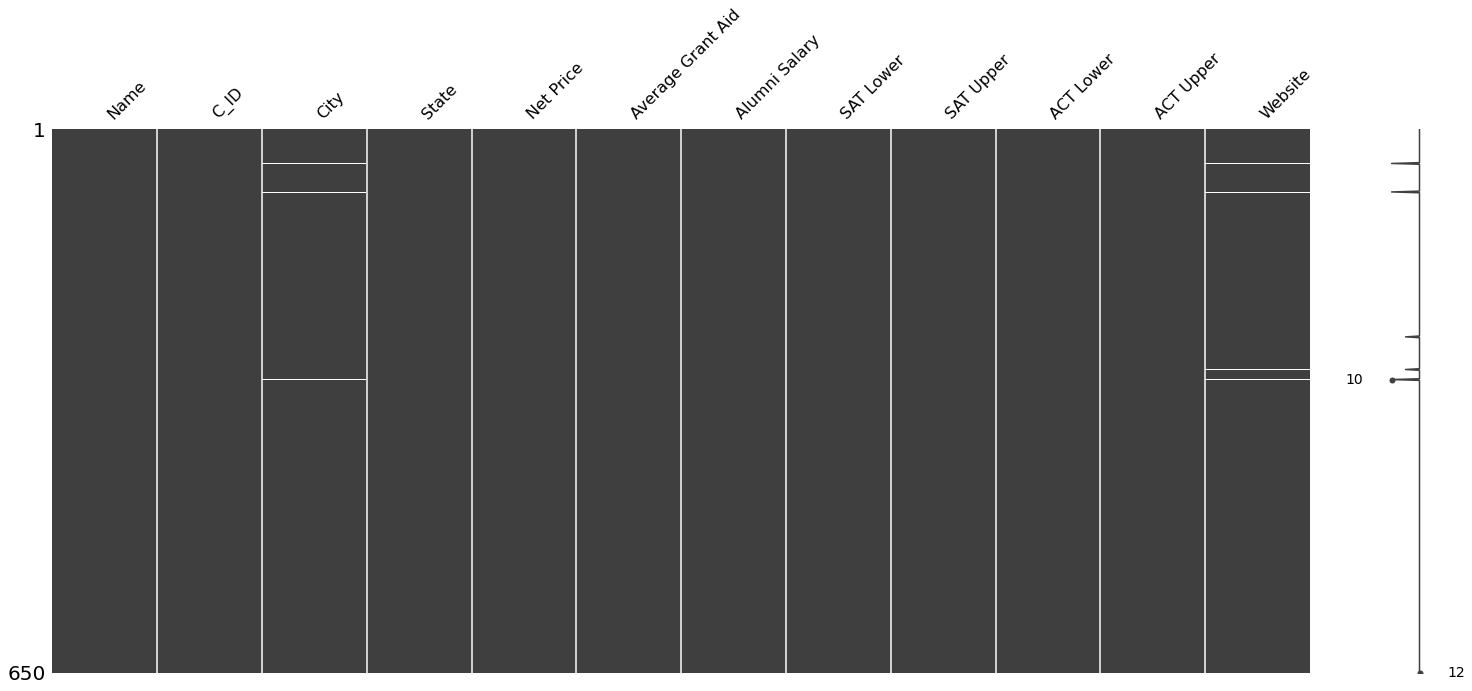

In [82]:
msno.matrix(df);

In [83]:
#df.to_csv('../data/Raw/D_forbes_cleaned.csv')

In [84]:
df = pd.read_csv('../data/Raw/D_social.csv')

df['Fraternity'] = np.where(df['Fraternities (Yes/No)']=='Yes',1,0)
df['Sorority'] = np.where(df['Sororities (Yes/No)']=='Yes',1,0)

df = df.drop(['Fraternities (Yes/No)','Sororities (Yes/No)'],axis=1)

for idx,row in df.iterrows():
    if row['% Fraternity'] == 'Not Reported':
        df.at[idx,'% Fraternity'] = 0
    if row['% Sorority'] == 'Not Reported':
        df.at[idx,'% Sorority'] = 0

df.head()

,Institution,C_ID,% Fraternity,% Sorority,Fraternity,Sorority
0,Albion College,ABIN,0.35,0.31,1,1
1,SUNY at Albany,ABL,0.03,0.03,0,0
2,Adelphi University,ADE,0.09,0.12,1,1
3,Agnes Scott College,AGN,0,0,0,0
4,Augustana College,AGST,0.12,0.24,0,0


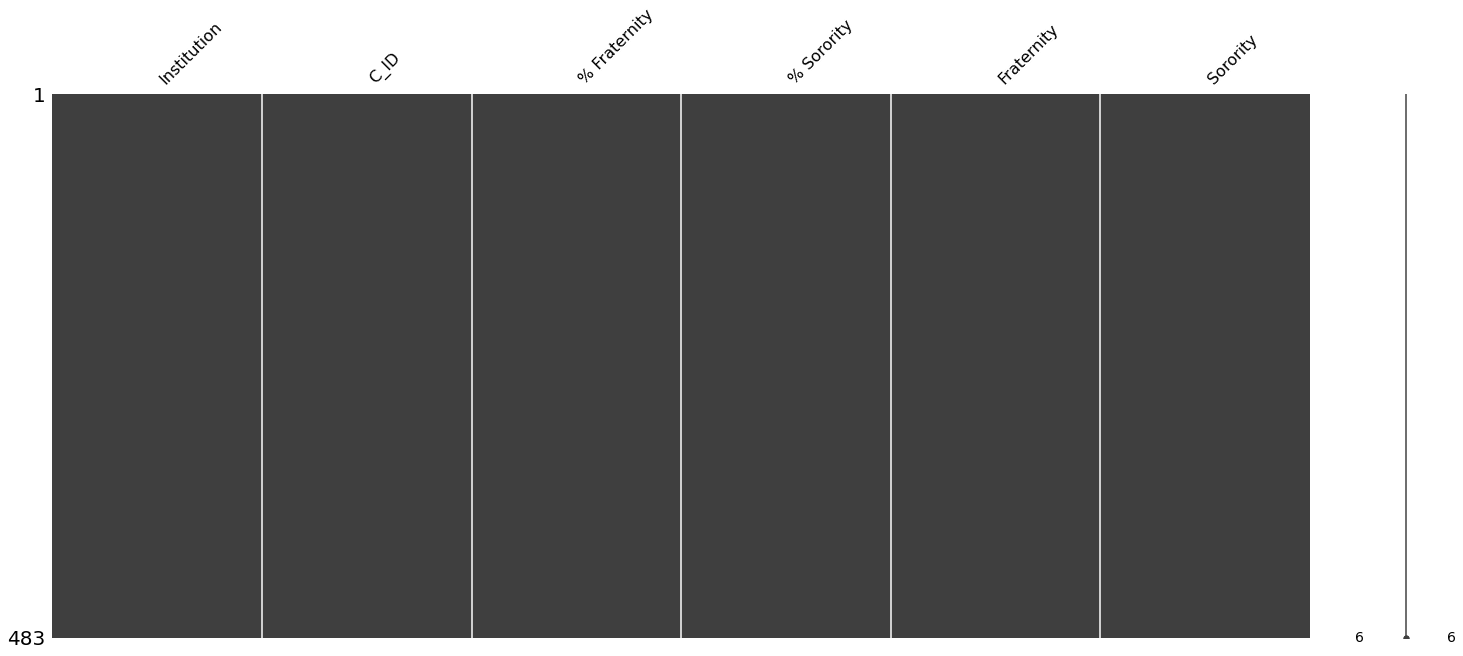

In [85]:
msno.matrix(df);

In [86]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

df.head(100)

,Institution,C_ID,% Fraternity,% Sorority,Fraternity,Sorority
0,Albion College,ABIN,0.35,0.31,1,1
1,SUNY at Albany,ABL,0.03,0.03,0,0
2,Adelphi University,ADE,0.09,0.12,1,1
3,Agnes Scott College,AGN,0,0,0,0
4,Augustana College,AGST,0.12,0.24,0,0
5,Alfred University,ALF,0,0,0,0
6,Allegheny College,ALL,0.21,0.22,1,1
7,Amherst College,AMH,0,0,0,0
8,Appalachian State University,APP,0.08,0.12,1,1
9,Assumption College,ASS,0,0,0,0


In [87]:
df.to_csv('../data/Raw/D_social_cleaned.csv')

In [49]:
df = pd.read_csv('../data/Raw/D_athletics.csv')

cols_to_normalize = ['Capacity']

for col in cols_to_normalize:
    df[col] = df[col] /df[col].abs().max()

df.head()

,C_ID,College,Stadium,Capacity
0,ALA,Alabama,Bryant–Denny Stadium,0.930075
1,AUB,Auburn University-Main Campus,Jordan-Hare Stadium,0.812734
2,BAY,Baylor University,McLane Stadium,0.419513
3,FRST,California State University at Fresno,Bulldog Stadium,0.378500
4,CLST,Colorado State University,Canvas Stadium,0.381037


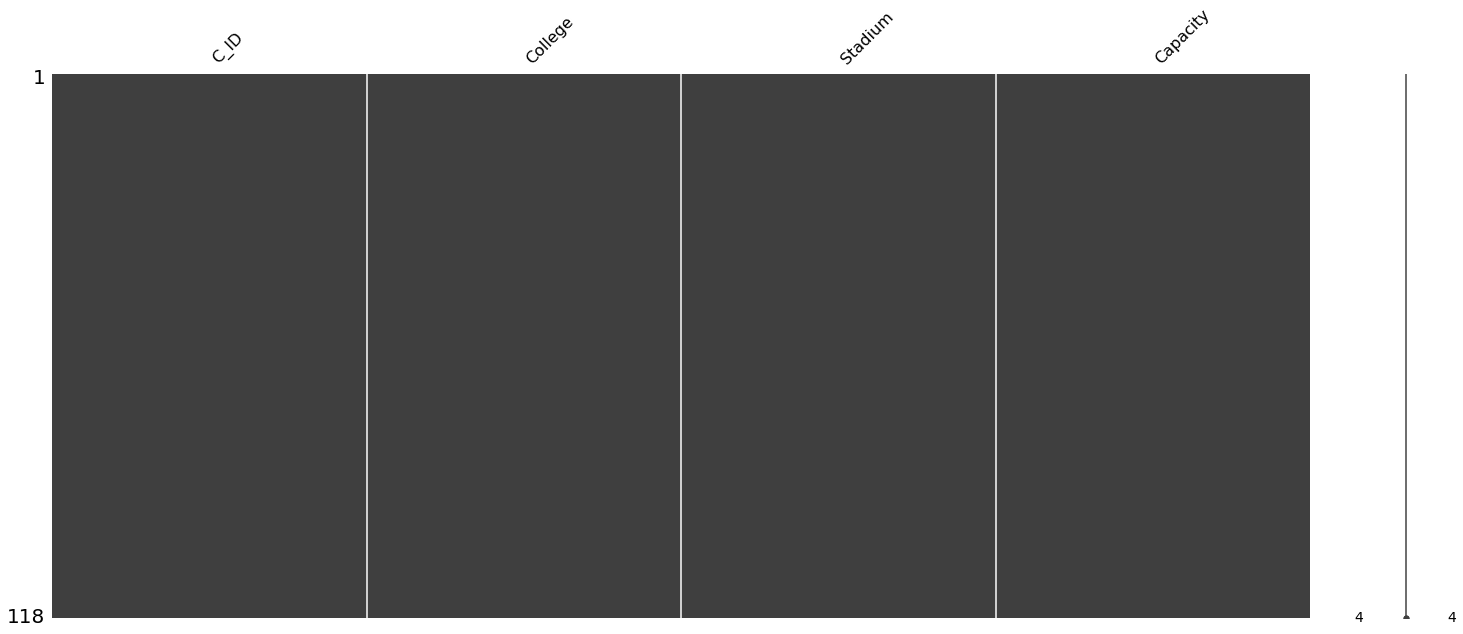

In [50]:
msno.matrix(df);

In [51]:
df.to_csv('../data/Raw/D_athletics_cleaned.csv')